In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from random import random
import matplotlib.colors as mcolors
import seaborn as sns
from sklearn.metrics import pairwise_distances
from scipy import stats


In [2]:
# Parameters
n_nodes = 100  # Number of nodes in the network
p_edge = 0.1  # Probability for Erdős–Rényi graph
m = 3          # Number of edges to attach in Barabási-Albert model
k_neighbors = 4 # Number of neighbors in Watts-Strogatz model
rewiring_prob = 0.3  # Rewiring probability in Watts-Strogatz model

# Create a different type of network
def create_network(model="erdos_renyi"):
    if model == "erdos_renyi":
        return nx.erdos_renyi_graph(n_nodes, p_edge)
    elif model == "barabasi_albert":
        return nx.barabasi_albert_graph(n_nodes, m)
    elif model == "watts_strogatz":
        return nx.watts_strogatz_graph(n_nodes, k_neighbors, rewiring_prob)
    else:
        raise ValueError("Invalid model type")

# Example: Create a Barabási-Albert network
G = create_network("barabasi_albert")


In [3]:
# Empathy Contagion Parameters
transmission_rate = 0.3  # Probability of empathy transmission
initial_empathy_percentage = 0.05  # Percentage of initial empathetic nodes
threshold = 2  # Empathy threshold for contagion to occur
time_steps = 50  # Number of simulation time steps
dynamic_threshold = False  # If True, will increase threshold over time

# Empathy State (0 = not empathetic, 1 = empathetic)
empathy_state = {node: 0 for node in G.nodes()}

# Initialize a few random nodes as empathetic
initial_empathetic_nodes = np.random.choice(G.nodes(), size=int(n_nodes * initial_empathy_percentage), replace=False)
for node in initial_empathetic_nodes:
    empathy_state[node] = 1

# Optionally, change the threshold dynamically (e.g., slowly increase it over time)
if dynamic_threshold:
    threshold_increase_rate = 0.05  # Threshold increase rate per time step


In [4]:
def spread_empathy(G, empathy_state, transmission_rate, threshold, dynamic_threshold=False, time_step=0):
    new_empathy_state = empathy_state.copy()

    # Optionally adjust threshold dynamically over time
    if dynamic_threshold:
        threshold += threshold_increase_rate

    for node in G.nodes():
        if empathy_state[node] == 0:  # Only consider nodes that are not yet empathetic
            empathetic_neighbors = sum(empathy_state[neighbor] == 1 for neighbor in G.neighbors(node))
            if empathetic_neighbors >= threshold:
                # Random chance to become empathetic based on transmission rate
                if random() < transmission_rate:
                    new_empathy_state[node] = 1

    return new_empathy_state


In [5]:
# Running the empathy contagion simulation
empirical_empathy_over_time = [empathy_state.copy()]

for t in range(time_steps):
    empathy_state = spread_empathy(G, empathy_state, transmission_rate, threshold, dynamic_threshold, t)
    empirical_empathy_over_time.append(empathy_state.copy())


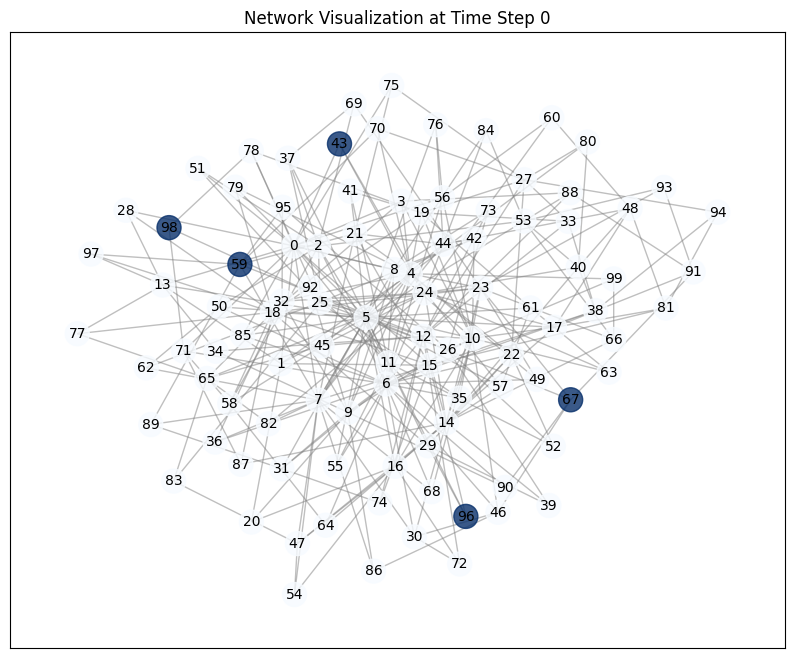

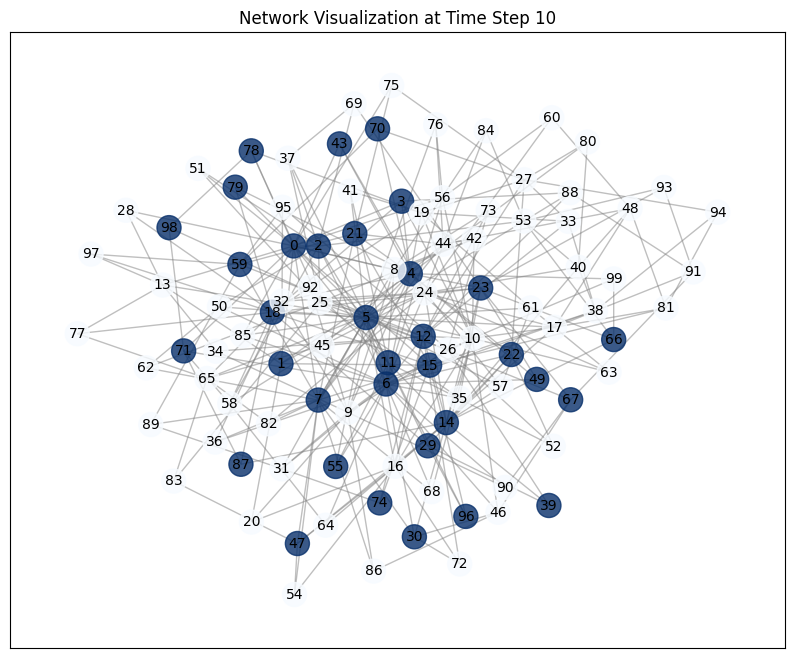

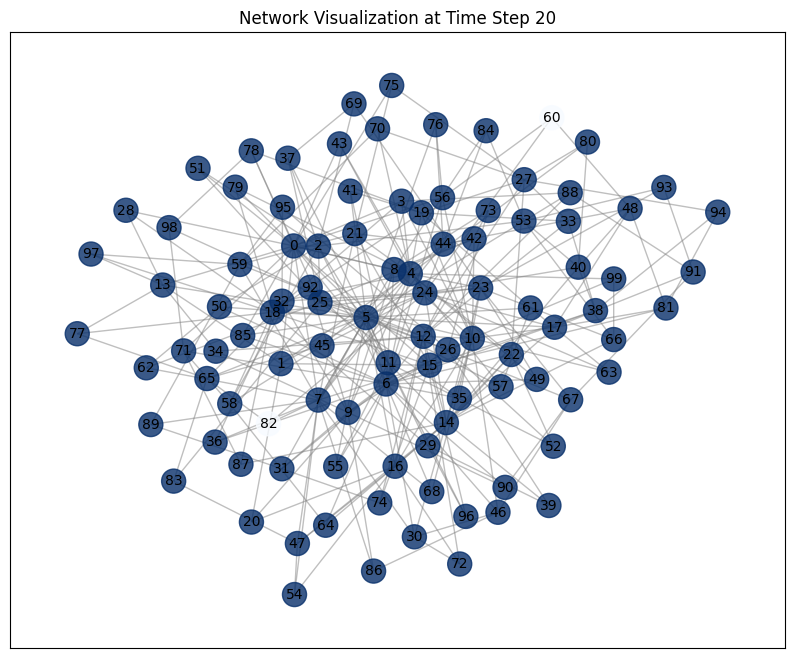

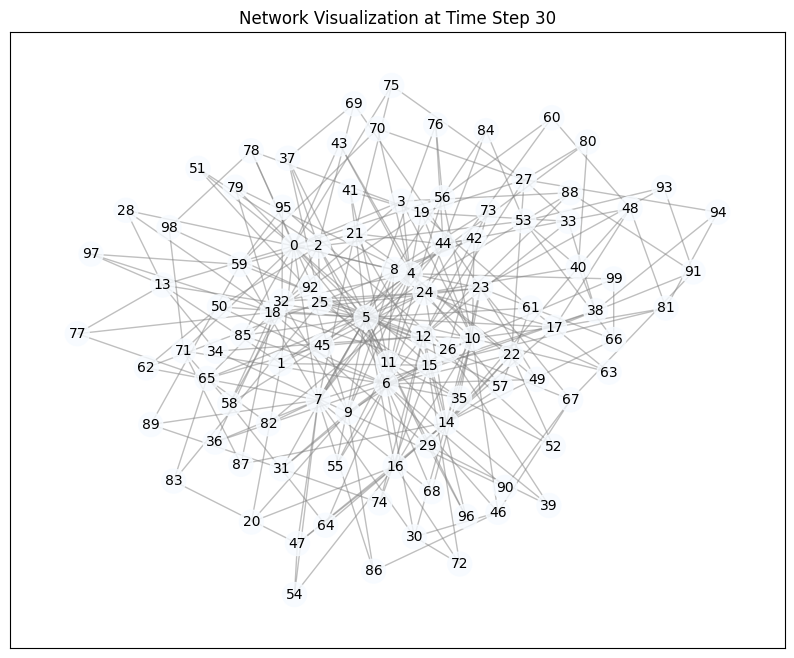

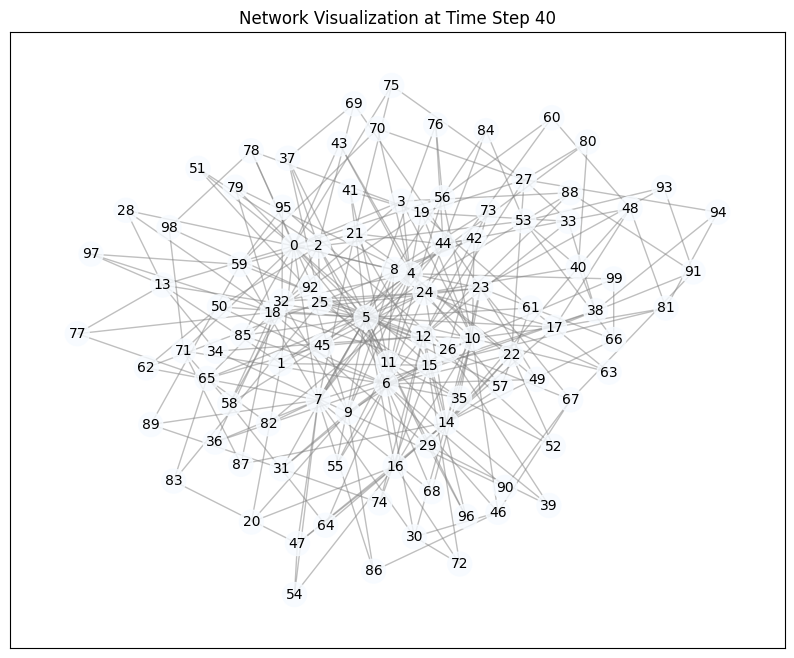

In [6]:
def plot_network(G, empathy_state, time_step, title="Network Visualization"):
    # Create node colors based on empathy state
    node_colors = [empathy_state[node] for node in G.nodes()]

    # Create a layout for node positioning
    pos = nx.spring_layout(G, seed=42)  # Use a fixed seed for consistency in layout

    plt.figure(figsize=(10, 8))
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=cm.Blues, node_size=300, alpha=0.8)
    nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color="gray")
    nx.draw_networkx_labels(G, pos, font_size=10)

    plt.title(f"{title} at Time Step {time_step}")
    plt.show()

# Visualize empathy spread at different time steps
for t in range(0, time_steps, 10):  # Show every 10 steps
    plot_network(G, empirical_empathy_over_time[t], t)


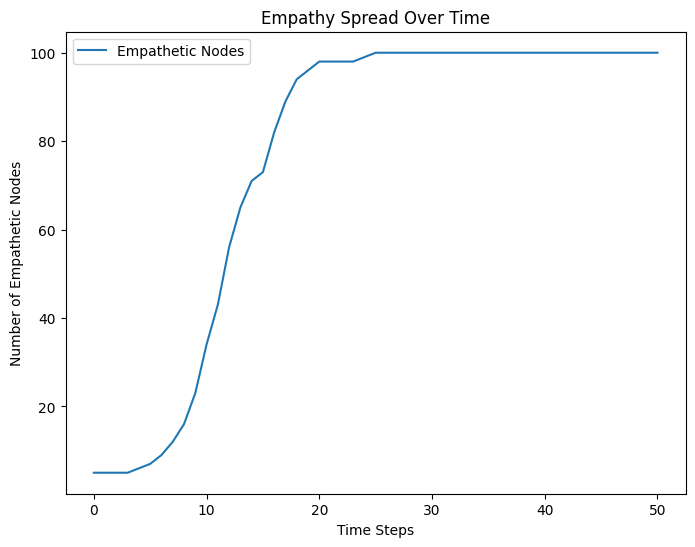

Average Clustering Coefficient: 0.1407
Average Shortest Path Length: 2.6085


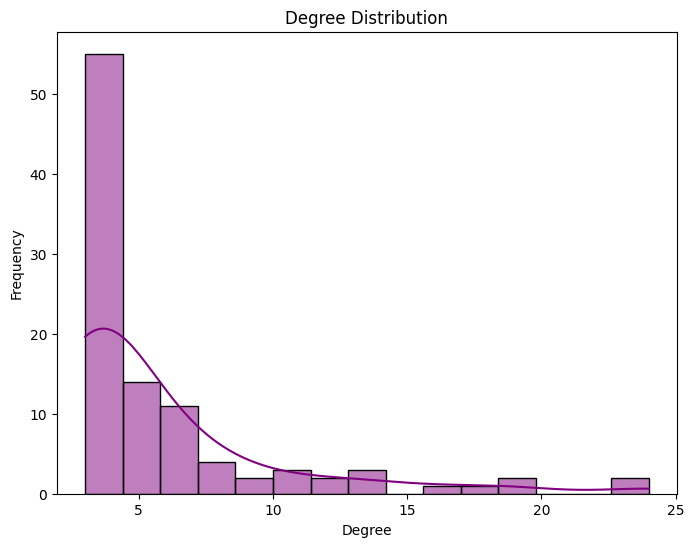

In [7]:
def analyze_spread(empirical_empathy_over_time):
    # Number of empathetic nodes at each time step
    empathetic_counts = [sum(state.values()) for state in empirical_empathy_over_time]

    # Plot the spread of empathy over time
    plt.figure(figsize=(8, 6))
    plt.plot(range(time_steps + 1), empathetic_counts, label="Empathetic Nodes")
    plt.xlabel("Time Steps")
    plt.ylabel("Number of Empathetic Nodes")
    plt.title("Empathy Spread Over Time")
    plt.legend()
    plt.show()

# Analyzing the spread of empathy
analyze_spread(empirical_empathy_over_time)

# Additional Analysis: Empathy Network Structure (Clustering Coefficient, Average Path Length, etc.)
def network_analysis(G):
    clustering_coeff = nx.average_clustering(G)
    avg_shortest_path_length = nx.average_shortest_path_length(G)

    print(f"Average Clustering Coefficient: {clustering_coeff:.4f}")
    print(f"Average Shortest Path Length: {avg_shortest_path_length:.4f}")

    # Degree distribution of the network
    degrees = [G.degree(node) for node in G.nodes()]
    plt.figure(figsize=(8, 6))
    sns.histplot(degrees, kde=True, color="purple")
    plt.title("Degree Distribution")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.show()

# Perform network analysis
network_analysis(G)


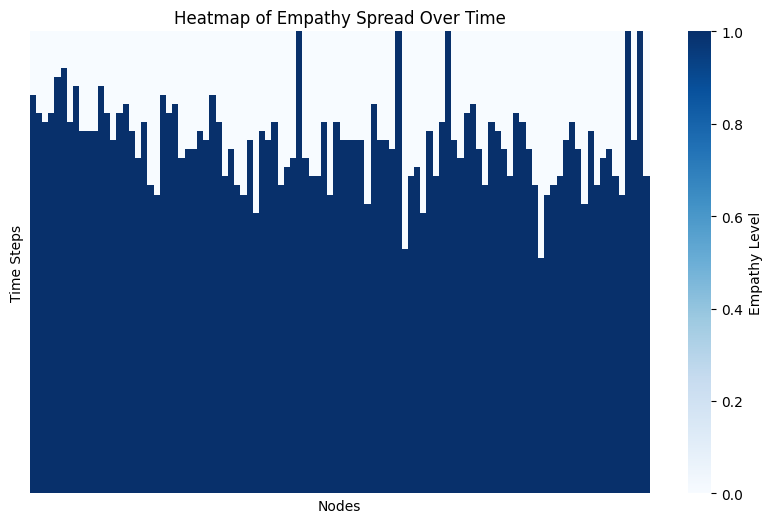

In [8]:
def empathy_heatmap(empirical_empathy_over_time):
    # Create a matrix to visualize how empathy spreads
    empathy_matrix = np.array([[empathy_state[node] for node in G.nodes()] for empathy_state in empirical_empathy_over_time])

    plt.figure(figsize=(10, 6))
    sns.heatmap(empathy_matrix, cmap="Blues", cbar_kws={'label': 'Empathy Level'}, xticklabels=False, yticklabels=False)
    plt.xlabel("Nodes")
    plt.ylabel("Time Steps")
    plt.title("Heatmap of Empathy Spread Over Time")
    plt.show()

# Generate the heatmap of empathy spread
empathy_heatmap(empirical_empathy_over_time)


In [9]:
def final_network_metrics(G):
    # Calculate metrics
    clustering_coeff = nx.average_clustering(G)
    avg_shortest_path_length = nx.average_shortest_path_length(G)
    diameter = nx.diameter(G) if nx.is_connected(G) else float("inf")

    print(f"Final Average Clustering Coefficient: {clustering_coeff:.4f}")
    print(f"Final Average Shortest Path Length: {avg_shortest_path_length:.4f}")
    print(f"Network Diameter: {diameter}")

# Display final network metrics
final_network_metrics(G)

Final Average Clustering Coefficient: 0.1407
Final Average Shortest Path Length: 2.6085
Network Diameter: 5
